In [1]:
import pandas as pd
pd.set_option('display.max_columns', 100)
import numpy as np
from math import sqrt
#ML
import statsmodels.api as sm
from sklearn import tree
from sklearn.model_selection import cross_val_score
from statsmodels.tools.eval_measures import rmse

In [2]:
df = pd.read_csv('data/data.csv', sep=';', decimal=',')
df.head()

,id,Marka,Model,Sztuk_sprzedanych_pierwsze_30_dni,cena_wysylka30A,Data_wystawienia_aukcji,CA_NAME_5,fea_30,bld_30,hli_30,dpg_30,sa_30,48h_30,sma_30,bgn_30,top_seller_sales_30m,unique_sellers30m,sum_tr_quantity30m,sum_tr_quantity6030m,sum_tr_quantity9060m,sum_tr_quantity12090m,sum_tr_quantity150120m,sum_tr_quantity180150m,cena_z_wysylka30m,mp_fea,mp_bld,mp_hli,mp_dpg,mp_sa,mp_48h,mp_sma,mp_bgn,top3_sales_30m,ILE_AUKCJI_W_DNIU_DEBIUTU_FIRMA,ILE_AUKCJI_Z_WYZSZA_CENA_W_DNIU_DEBIUTU_FIRMA,ILE_AUKCJI_Z_ROWNA_CENA_W_DNIU_DEBIUTU_FIRMA,ILE_AUKCJI_Z_NIZSZA_CENA_W_DNIU_DEBIUTU_FIRMA,sez_IND
0,2,babyliss,3038E,21,105.000000,05.11.2018,Lok?ki,1,1,1,0,1.0,1.000000,1,0.733333,19,5,45,23,36,23,18,40,108.650000,0.800000,0.000000,0.000000,0.000000,0.977778,1.000000,0.0,0.000000,39.0,13,13,0,0,1.514411
1,3,babyliss,6614E,27,180.000000,05.11.2018,Suszarki do w?os?,1,1,1,0,1.0,0.066667,1,0.933333,4,5,8,15,12,10,7,14,199.497500,0.500000,0.500000,0.000000,0.000000,0.875000,0.875000,0.0,0.000000,6.0,8,8,0,0,1.475193
2,7,babyliss,AS130E,40,139.000000,05.11.2018,Lok?ki,1,1,1,0,1.0,0.125000,1,0.833333,6,5,11,2,7,5,10,11,141.225454,0.090909,0.000000,0.000000,0.000000,0.909091,0.818182,0.0,0.000000,9.0,13,12,1,0,1.514411
3,8,babyliss,CurlSecret C1100E,498,306.750000,23.11.2018,Lok?ki,1,1,1,0,1.0,0.111111,1,0.000000,58,21,226,113,138,185,135,178,317.417965,0.898230,0.022124,0.146018,0.013274,0.491150,0.000000,0.0,0.261062,116.0,28,26,1,1,3.134278
4,9,babyliss,D371E,5,165.096774,05.11.2018,Suszarki do w?os?,1,1,1,0,1.0,1.000000,1,0.000000,2,2,3,1,3,0,0,0,173.326667,0.333333,0.000000,0.000000,0.000000,0.666667,1.000000,0.0,0.000000,3.0,9,8,0,1,1.475193


In [3]:
df.describe()

,id,Sztuk_sprzedanych_pierwsze_30_dni,cena_wysylka30A,fea_30,bld_30,hli_30,dpg_30,sa_30,48h_30,sma_30,bgn_30,top_seller_sales_30m,unique_sellers30m,sum_tr_quantity30m,sum_tr_quantity6030m,sum_tr_quantity9060m,sum_tr_quantity12090m,sum_tr_quantity150120m,sum_tr_quantity180150m,cena_z_wysylka30m,mp_fea,mp_bld,mp_hli,mp_dpg,mp_sa,mp_48h,mp_sma,mp_bgn,top3_sales_30m,ILE_AUKCJI_W_DNIU_DEBIUTU_FIRMA,ILE_AUKCJI_Z_WYZSZA_CENA_W_DNIU_DEBIUTU_FIRMA,ILE_AUKCJI_Z_ROWNA_CENA_W_DNIU_DEBIUTU_FIRMA,ILE_AUKCJI_Z_NIZSZA_CENA_W_DNIU_DEBIUTU_FIRMA,sez_IND
count,202.000000,202.000000,202.000000,202.0,202.0,202.000000,202.000000,202.000000,202.000000,202.0,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,202.000000,199.000000,199.000000,199.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,159.886139,57.549505,364.461258,1.0,1.0,0.990099,0.019802,0.979414,0.233488,1.0,0.230644,39.960396,9.326733,97.371287,80.128713,77.079208,75.737624,72.896040,74.267327,353.310386,0.731001,0.122495,0.062242,0.002883,0.830387,0.474597,0.041453,0.019441,77.804020,23.638614,18.217822,0.544554,4.876238,1.604506
std,80.463903,107.127116,689.034468,0.0,0.0,0.099256,0.139665,0.139712,0.361125,0.0,0.379604,82.720824,10.125195,215.533275,172.357298,166.280898,160.230231,148.147547,145.623715,633.673801,0.295143,0.221752,0.156976,0.015573,0.256793,0.457385,0.145962,0.069950,184.132903,37.545900,26.680943,0.886883,12.420475,0.535647
min,2.000000,1.000000,25.000000,1.0,1.0,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.013382,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.536194
25%,90.250000,11.250000,98.462384,1.0,1.0,1.000000,0.000000,1.000000,0.000000,1.0,0.000000,4.000000,3.000000,8.000000,6.000000,6.000000,5.000000,4.250000,3.250000,104.696335,0.662879,0.000000,0.000000,0.000000,0.800000,0.000000,0.000000,0.000000,8.000000,6.000000,5.000000,0.000000,0.000000,1.228037
50%,171.000000,25.000000,148.761555,1.0,1.0,1.000000,0.000000,1.000000,0.000000,1.0,0.000000,16.000000,7.000000,32.000000,24.500000,24.500000,23.500000,24.500000,24.000000,163.213125,0.847619,0.000000,0.000000,0.000000,0.944828,0.541667,0.000000,0.000000,26.000000,13.000000,12.000000,0.000000,1.000000,1.420205
75%,229.750000,58.500000,274.959597,1.0,1.0,1.000000,0.000000,1.000000,0.410714,1.0,0.489583,40.000000,12.750000,101.750000,79.500000,80.000000,85.000000,74.250000,73.750000,278.523659,0.925117,0.151888,0.025801,0.000000,1.000000,0.974493,0.000000,0.000000,76.500000,27.750000,24.000000,1.000000,4.000000,1.905186
max,286.000000,788.000000,5132.030303,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,721.000000,85.000000,1632.000000,1606.000000,1560.000000,1444.000000,1334.000000,1254.000000,5149.000000,1.000000,1.000000,1.000000,0.147059,1.000000,1.000000,1.000000,0.439024,2022.000000,381.000000,258.000000,4.000000,121.000000,3.134278


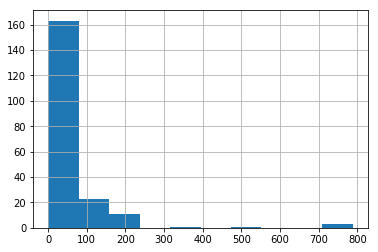

In [6]:
df['Sztuk_sprzedanych_pierwsze_30_dni'].hist()

In [4]:
df['Data_wystawienia_aukcji'] = pd.to_datetime(df['Data_wystawienia_aukcji'], format='%d.%m.%Y' )

def time_untill_christmas(dt_obj):
    month = dt_obj.month
    day = dt_obj.day
    if 12 - month == 0:
        return 25 - day
    else:
        return 25 + (30 - day) + 30*(11-month)
    
df['time_untill_christmas'] = df['Data_wystawienia_aukcji'].apply(time_untill_christmas)

In [5]:
df.drop(['fea_30',
         'bld_30',
         'sma_30',
         'Model',
         'Marka',
         'CA_NAME_5',
         'Data_wystawienia_aukcji',
         'id'], axis=1, inplace=True)
df = df.fillna(df.mean())

In [6]:
df.head()

,Sztuk_sprzedanych_pierwsze_30_dni,cena_wysylka30A,hli_30,dpg_30,sa_30,48h_30,bgn_30,top_seller_sales_30m,unique_sellers30m,sum_tr_quantity30m,sum_tr_quantity6030m,sum_tr_quantity9060m,sum_tr_quantity12090m,sum_tr_quantity150120m,sum_tr_quantity180150m,cena_z_wysylka30m,mp_fea,mp_bld,mp_hli,mp_dpg,mp_sa,mp_48h,mp_sma,mp_bgn,top3_sales_30m,ILE_AUKCJI_W_DNIU_DEBIUTU_FIRMA,ILE_AUKCJI_Z_WYZSZA_CENA_W_DNIU_DEBIUTU_FIRMA,ILE_AUKCJI_Z_ROWNA_CENA_W_DNIU_DEBIUTU_FIRMA,ILE_AUKCJI_Z_NIZSZA_CENA_W_DNIU_DEBIUTU_FIRMA,sez_IND,time_untill_christmas
0,21,105.000000,1,0,1.0,1.000000,0.733333,19,5,45,23,36,23,18,40,108.650000,0.800000,0.000000,0.000000,0.000000,0.977778,1.000000,0.0,0.000000,39.0,13,13,0,0,1.514411,50
1,27,180.000000,1,0,1.0,0.066667,0.933333,4,5,8,15,12,10,7,14,199.497500,0.500000,0.500000,0.000000,0.000000,0.875000,0.875000,0.0,0.000000,6.0,8,8,0,0,1.475193,50
2,40,139.000000,1,0,1.0,0.125000,0.833333,6,5,11,2,7,5,10,11,141.225454,0.090909,0.000000,0.000000,0.000000,0.909091,0.818182,0.0,0.000000,9.0,13,12,1,0,1.514411,50
3,498,306.750000,1,0,1.0,0.111111,0.000000,58,21,226,113,138,185,135,178,317.417965,0.898230,0.022124,0.146018,0.013274,0.491150,0.000000,0.0,0.261062,116.0,28,26,1,1,3.134278,32
4,5,165.096774,1,0,1.0,1.000000,0.000000,2,2,3,1,3,0,0,0,173.326667,0.333333,0.000000,0.000000,0.000000,0.666667,1.000000,0.0,0.000000,3.0,9,8,0,1,1.475193,50


In [7]:
X = np.asarray(df.drop('Sztuk_sprzedanych_pierwsze_30_dni', axis=1))
y = np.asarray(df['Sztuk_sprzedanych_pierwsze_30_dni'])

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     10.50
Date:                Mon, 15 Apr 2019   Prob (F-statistic):           3.24e-25
Time:                        14:10:48   Log-Likelihood:                -1153.4
No. Observations:                 202   AIC:                             2365.
Df Residuals:                     173   BIC:                             2461.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0059      0.020      0.296      0.768      -0.034       0.045
x2           -91.7093     76.850     -1.193      0.234    -243.393      59.974
x3            22.5365    100.055      0.225      0.822    -174.950     220.023
x4            40.5972     92.183      0.440      0.660    -141.350     222.545
x5             1.4944     19.740      0.076      0.940     -37.468      40.456
x6            29.4140     17.341      1.696      0.092      -4.814      63.642
x7             0.7392      0.163      4.529      0.000       0.417       1.061
x8             1.8280      1.332      1.372      0.172      -0.801       4.457
x9             0.3646      0.106      3.431      0.001       0.155       0.574
x10           -0.6677      0.221     -3.023      0.003      -1.104      -0.232
x11            0.1228      0.315      0.390      0.697      -0.498       0.744
x12           -0.0387      0.371     -0.104      0.917      -0.772       0.695
x13            0.3125      0.287      1.088      0.278      -0.254       0.879
x14            0.1490      0.164      0.911      0.364      -0.174       0.472
x15           -0.0111      0.023     -0.495      0.621      -0.056       0.033
x16          -12.2574     22.420     -0.547      0.585     -56.509      31.994
x17          -30.8028     33.300     -0.925      0.356     -96.529      34.924
x18          -37.7238     50.635     -0.745      0.457    -137.665      62.217
x19         -351.7566    429.857     -0.818      0.414   -1200.196     496.683
x20          -15.2868     27.484     -0.556      0.579     -69.533      38.960
x21           10.1119     15.087      0.670      0.504     -19.667      39.891
x22           20.2974     45.766      0.444      0.658     -70.034     110.629
x23           33.4872     94.762      0.353      0.724    -153.551     220.525
x24           -0.3970      0.103     -3.850      0.000      -0.601      -0.193
x25           -1.9710      1.677     -1.175      0.242      -5.282       1.340
x26            2.7249      1.763      1.546      0.124      -0.754       6.204
x27           -6.1161      5.060     -1.209      0.228     -16.103       3.871
x28            1.4203      1.829      0.777      0.438      -2.190       5.030
x29           41.9549     12.510      3.354      0.001      17.262      66.648
x30            0.3394      0.456      0.745      0.457      -0.560       1.239
==============================================================================
Omnibus:                      217.693   Durbin-Watson:                   1.667
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9367.908
Skew:                           4.106   Prob(JB):                         0.00
Kurtosis:                      35.336   Cond. No.                     1.34e+16
==============================================================================

W

In [8]:
# now generate predictions
ypred = model.predict(X)
# calc rmse
print(rmse(y, ypred))

In [321]:
clf = tree.DecisionTreeRegressor(max_depth=5)
results = cross_val_score(clf, X, y, cv=10, scoring='neg_mean_absolute_error')
print('rmse:{} ({})'.format(results.mean()*-1, results.std()))

rmse:57.733232913152825 (28.940565823459746)


NotFittedError: This DecisionTreeRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.